In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#3x-6x3-x4+4 when x = [-6,1]

    
X = torch.tensor(np.linspace(start = -6, stop = 1, num = 10000), requires_grad=True)
print(type(X))
y = 3 * X - 6 * X ** 3 - X ** 4 + 4
local_min_max = []
print(len(y))
for i in range(len(y)):
    y[i].backward(retain_graph=True)
    
    
zeros = np.where(torch.abs(X.grad) <= 0.1)
print(zeros[0])



<class 'torch.Tensor'>
10000
[2195 2196 2197 2198 7947 7948 7949 7950 7951 7952 7953 7954 7955 7956
 7957 7958 7959 7960 7961 7962 7963 7964 7965 7966 7967 7968 9121 9122
 9123 9124 9125 9126 9127 9128 9129 9130 9131 9132 9133 9134 9135 9136
 9137 9138]


-100.0


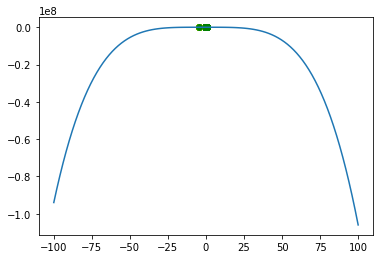

In [15]:
def calculateFunc(x):
    
    y = 3 * x - 6 * x ** 3 - x ** 4 + 4
    #print("x = ", x, "y = ", y)
    return y
    
#plotting
x = np.linspace(start = -100, stop = 100, num = 100)
print(x[0])
y_list = []
for each in x:
    val = calculateFunc(each)
    #print(val)
    y_list.append(val)
    
#print(y_list)
plt.plot(x, y_list, ls='-')    
for i in range(len(zeros[0])):
    plt.scatter(X[zeros[0][i]].detach().numpy(), calculateFunc(X[zeros[0][i]].detach().numpy()), color="Green")
    plt.scatter(X[zeros[0][1]].detach().numpy(), calculateFunc(X[zeros[0][1]].detach().numpy()), color="Yellow")
    plt.scatter(X[zeros[0][2]].detach().numpy(), calculateFunc(X[zeros[0][2]].detach().numpy()), color= "Green")
plt.show()


In [6]:
#0.3915999999993287 tensor(-0.0005)

#i ---value of grag...  0.39156999994227276 tensor(-4.0293e-05)

In [10]:
import torch
from tqdm import tqdm
import numpy as np
x = torch.tensor(np.linspace(start = -3.1416, stop = 3.1416, num = 1000), requires_grad = True)
y = torch.tensor(np.linspace(start = -3.1416, stop = 3.1416, num = 1000), requires_grad = True)

z = torch.cos(x) * torch.sin(y)
xy_pair = []

gradient_x = []
gradient_y = []
#final
for i in tqdm(x):
    for j in y:
        input_x = torch.tensor(i, requires_grad=True)
        input_y = torch.tensor(j, requires_grad=True)
        z = torch.cos(input_x) * torch.sin(input_y)
        z.backward()
        
        gradient_x.append(input_x.grad)
        gradient_y.append(input_y.grad)
        #print(torch.abs(input_x.grad), "----", torch.abs(input_y.grad))
        if torch.abs(input_x.grad) <= 0.01 and torch.abs(input_y.grad) <= 0.01:
            print("found!")
            xy_pair.append([i, j])
            #print([i, j])
            


print(xy_pair)

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-10-bca0ca66e2cc>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_x = torch.tensor(i, requires_grad=True)
<ipython-input-10-bca0ca66e2cc>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_y = torch.tensor(j, requires_grad=True)
  0%|          | 2/1000 [00:00<05:48,  2.86it/s]

found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!


 25%|██▌       | 251/1000 [00:24<01:11, 10.43it/s]

found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!


 25%|██▌       | 253/1000 [00:25<01:11, 10.43it/s]

found!
found!
found!
found!
found!
found!


 50%|█████     | 500/1000 [00:49<00:52,  9.59it/s]

found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!


 50%|█████     | 502/1000 [00:49<00:53,  9.28it/s]

found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!


 75%|███████▍  | 749/1000 [01:14<00:27,  9.22it/s]

found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!


 75%|███████▌  | 751/1000 [01:14<00:25,  9.58it/s]

found!
found!
found!
found!
found!
found!


100%|██████████| 1000/1000 [01:38<00:00, 10.17it/s]

found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
found!
[[tensor(-3.1416, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(-1.5755, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(-3.1416, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(-1.5692, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(-3.1416, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(-1.5629, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(-3.1416, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(1.5629, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(-3.1416, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(1.5692, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(-3.1416, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(1.5755, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(-3.1353, dtype=torch.float64, grad_fn=<UnbindBackward>), tensor(-1.5755, dtype=torch.float64, grad_fn=<UnbindBackward>)], [tensor(

In [11]:
for i in xy_pair:
    print(i[0].data, i[1].data)

tensor(-3.1416, dtype=torch.float64) tensor(-1.5755, dtype=torch.float64)
tensor(-3.1416, dtype=torch.float64) tensor(-1.5692, dtype=torch.float64)
tensor(-3.1416, dtype=torch.float64) tensor(-1.5629, dtype=torch.float64)
tensor(-3.1416, dtype=torch.float64) tensor(1.5629, dtype=torch.float64)
tensor(-3.1416, dtype=torch.float64) tensor(1.5692, dtype=torch.float64)
tensor(-3.1416, dtype=torch.float64) tensor(1.5755, dtype=torch.float64)
tensor(-3.1353, dtype=torch.float64) tensor(-1.5755, dtype=torch.float64)
tensor(-3.1353, dtype=torch.float64) tensor(-1.5692, dtype=torch.float64)
tensor(-3.1353, dtype=torch.float64) tensor(-1.5629, dtype=torch.float64)
tensor(-3.1353, dtype=torch.float64) tensor(1.5629, dtype=torch.float64)
tensor(-3.1353, dtype=torch.float64) tensor(1.5692, dtype=torch.float64)
tensor(-3.1353, dtype=torch.float64) tensor(1.5755, dtype=torch.float64)
tensor(-1.5755, dtype=torch.float64) tensor(-3.1416, dtype=torch.float64)
tensor(-1.5755, dtype=torch.float64) tensor(

In [33]:

#Final value of x, and y tensor(1.5685, requires_grad=True) tensor(-0.0074, requires_grad=True)


test = torch.tensor(3.1416/2, requires_grad = True)
y  = torch.sin(test)
y.backward()
print(test.grad)
print(test.grad)

tensor(-3.6200e-06)
tensor(-3.6200e-06)


96


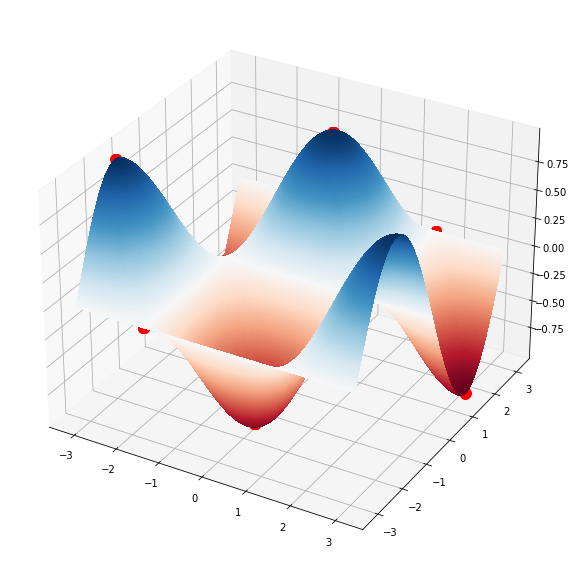

In [101]:
import matplotlib.pyplot as plt
from pylab import cm, meshgrid
print(len(xy_pair))
fig = plt.figure(figsize = (10., 50.))
ax = fig.gca(projection='3d')


x = np.linspace(start = -3.1416, stop = 3.1416, num = 1000)
y = np.linspace(start = -3.1416, stop = 3.1416, num = 1000)
X, Y = meshgrid(x, y)
Z = np.cos(X) * np.sin(Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=2, 
                       cmap=cm.RdBu, antialiased=False)

for i in xy_pair:
    Z_ = np.cos(i[0].detach().numpy() ) * np.sin(i[1].detach().numpy())
    plt.plot(i[0].detach().numpy() , i[1].detach().numpy() , Z_, 'ro', markersize=10)
    
plt.show()

In [3]:
#Using Single Loop

import random
import numpy as np
import torch
from random import randint
def calculateFunc(x):
    
    y = 3 * x - 6 * x ** 3 - x ** 4 + 4
    #print("x = ", x, "y = ", y)
    return y
    
#plotting
#x = np.linspace(start = -6, stop = 1, num = 1000)

y_list = []
X = torch.tensor(float(randint(-10, 10)), requires_grad=True)
#X = torch.tensor(2.0, requires_grad=True)
print("Starting Value ", X.data)
threshold = 0.01
learning_rate = 0.001
#need different logic for finding minima and maxima

counter = 0
final_X = 0
final_Y = 0

while True:
    counter +=1
    y = 3 * X - 6 * X ** 3 - X ** 4 + 4
    y.backward()
    gradient = X.grad
    #print(gradient)
    #print(val)
    if torch.abs(gradient) <= threshold:
        print("Value found")
        print("Value of X and y, ", X, y)
        final_X = X
        final_Y = y
        break
    #update X using gradient
    
    if gradient > 1000:
        learning_rate = 0.0001
    if gradient > 100000:
        learning_rate = 0.000001
    else:
        learning_rate = 0.01
    print("Value of gradient ", gradient)
    if gradient < 0:
        X = torch.tensor(X + gradient * learning_rate, requires_grad=True)
        #X = torch.tensor(X -0.1, requires_grad=True)
        print("Inside if.. ",X)
    else: 
        X = torch.tensor(X - gradient * learning_rate, requires_grad=True)
        #X = torch.tensor(X + 0.1, requires_grad=True)
        print("Inside else.. ", X)
       
    if counter % 1000 == 0:
        print("1000 iterations completed")
        learning_rate *= 100
        if learning_rate > 0.01:
            learning_rate = 0.01
            
    
            
        
print("total loop ", counter)

Starting Value  tensor(4.)
Value of gradient  tensor(-541.)
Inside if..  tensor(-1.4100, requires_grad=True)
Value of gradient  tensor(-21.5729)
Inside if..  tensor(-1.6257, requires_grad=True)
Value of gradient  tensor(-27.3867)
Inside if..  tensor(-1.8996, requires_grad=True)
Value of gradient  tensor(-34.5339)
Inside if..  tensor(-2.2449, requires_grad=True)
Value of gradient  tensor(-42.4597)
Inside if..  tensor(-2.6695, requires_grad=True)
Value of gradient  tensor(-49.1786)
Inside if..  tensor(-3.1613, requires_grad=True)
Value of gradient  tensor(-50.5148)
Inside if..  tensor(-3.6665, requires_grad=True)
Value of gradient  tensor(-41.8207)
Inside if..  tensor(-4.0847, requires_grad=True)
Value of gradient  tensor(-24.7182)
Inside if..  tensor(-4.3319, requires_grad=True)
Value of gradient  tensor(-9.6210)
Inside if..  tensor(-4.4281, requires_grad=True)
Value of gradient  tensor(-2.6420)
Inside if..  tensor(-4.4545, requires_grad=True)
Value of gradient  tensor(-0.6126)
Inside i

<ipython-input-3-c51a70acc632>:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X + gradient * learning_rate, requires_grad=True)


-6.0


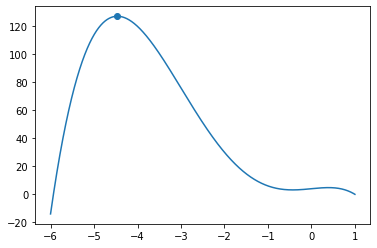

In [6]:

import matplotlib.pyplot as plt
x = np.linspace(start = -6, stop = 1, num = 10000)
print(x[0])
y_list = []
for each in x:
    val = calculateFunc(each)
    #print(val)
    y_list.append(val)
    
#print(y_list)
plt.plot(x, y_list, ls='-') 
plt.scatter(final_X.detach().numpy(), final_Y.detach().numpy())
plt.show()

In [8]:
#problem 2
from random import randint
import random
from tqdm import tqdm
import numpy as np


learning_rate = 0.001
threshold = 0.01

def update(gradient, var):
    if torch.abs(gradient) <= 0.01:
        return var
    if gradient < 0:
        return torch.tensor(var + gradient * learning_rate, requires_grad=True)
    elif gradient > 0:
        return torch.tensor(var - gradient * learning_rate, requires_grad=True)
    



#final values
final_x = 0
final_y = 0

while True:
    x = torch.tensor(random.uniform(-3.1416, 3.1416), requires_grad=True)
    y = torch.tensor(random.uniform(-3.1416, 3.1416), requires_grad=True)
    
    z = torch.cos(x) * torch.sin(y)
    z.backward()
    dzdx = x.grad
    dzdy = y.grad
    
    if torch.abs(dzdx) <= 0.01 and torch.abs(dzdy) <= 0.01:
        print("value found")
        final_x = x
        final_y = y
        print("Final value of x, and y", final_x, final_y)
        break
    
    
    x = update(dzdx, x)
    y = update(dzdy, y)
            




<ipython-input-8-87de63363cba>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(var - gradient * learning_rate, requires_grad=True)
<ipython-input-8-87de63363cba>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(var + gradient * learning_rate, requires_grad=True)


value found
Final value of x, and y tensor(1.5685, requires_grad=True) tensor(-0.0074, requires_grad=True)


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

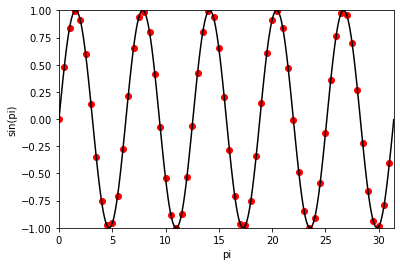

In [1]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

x = np.arange(0, 10*np.pi, 0.01)
y = np.sin(x)

fig = plt.figure()
ax = plt.subplot(1, 1, 1)

data_skip = 50


def init_func():
    ax.clear()
    plt.xlabel('pi')
    plt.ylabel('sin(pi)')
    plt.xlim((x[0], x[-1]))
    plt.ylim((-1, 1))


def update_plot(i):
    ax.plot(x[i:i+data_skip], y[i:i+data_skip], color='k')
    ax.scatter(x[i], y[i], marker='o', color='r')



anim = FuncAnimation(fig,
                     update_plot,
                     frames=np.arange(0, len(x), data_skip),
                     init_func=init_func,
                     interval=20)

anim.save('sine.mp4', dpi=150, fps = 30, writer='ffmpeg')